# Лабораторная работа 2. Линейная регрессия. Градиентный спуск

Вспомним нормальное уравнение:

$$\overrightarrow{w}_{opt} = \left(X^TX\right)^{-1}X^T\overrightarrow{y}.$$

Здесь присутствует обращение матрицы $X^TX$ – довольно трудоёмкая операция при большом количестве признаков: сложность вычислений $O(d^3)$. При решении реальных задач такая трудоёмкость часто оказывается непозволительной, поэтому параметры модели (весовые коэффициенты) ищут итерационными методами, стоимость которых меньше. Один из них – *градиентный спуск* (gradient descent – ['greɪdɪənt dɪ'sent]).

Напомним, что в градиентном спуске значения параметров на следующем шаге получаются из значений параметров на текущем шаге смещением в сторону антиградиента функционала ошибки: 

$$\overrightarrow{w}^{(k+1)} = \overrightarrow{w}^{(k)} - \eta_k \nabla Q(\overrightarrow{w}^{(k)}),$$
где $\eta_k$ – шаг градиентного спуска.

Формула градиента функционала ошибки выглядит следующим образом:

$$\nabla Q(\overrightarrow{w}) = \nabla_\overrightarrow{w}\left(\frac{1}{l}\|X\overrightarrow{w}-\overrightarrow{y}\|^2\right) = \frac{2}{l}X^T(X\overrightarrow{w} - \overrightarrow{y}).$$
 
Сложность вычислений в данном случае $O(dl)$.

In [316]:
import numpy as np
import matplotlib.pyplot as plt

**Задание 1. Реализация градиентного спуска**  

Напишите функцию `gradient_descent`, которая находит вектор весов на основе градиентного спуска.  

В качестве критериев остановки можно использовать максимальное количество шагов и/или количество шагов, при котором отсутствуют значимые изменения весов.

Проверьте работу функции на простом примере из лекций:

$$x_1=2, x_2=3, x_3=5,$$

$$y_1=1, y_2=3, y_3=4.$$

Нарисуйте исходные данные и полученную линию регресии при помощи ``matplotlib``: для рисования точек используйте ``plt.scatter``, для рисования линии – ``plt.plot``.  

Сравните полученные результаты с результатами, полученными на основе нормального уравнения.

In [317]:
x = np.array([2, 3, 5])
y = np.array([1, 3, 4])

In [318]:
def gradient_descent(X, y, lr=0.01, max_iter=1000, eps=1e-6):
    X = X.reshape(-1, 1)
    X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
    m = len(y)
    theta = np.array([np.random.choice(X[:, 1]), np.random.choice(X[:, 1])])
    print(theta)
    loss_history = []
    
    for _ in range(max_iter):
        predictions = X.dot(theta)
        gradient = (1 / m) * X.T.dot(predictions - y)
        new_theta = theta - lr * gradient
        loss = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
        loss_history.append(loss)
        if np.linalg.norm(new_theta - theta) < eps:
            break
        theta = new_theta
    
    return theta, loss_history


In [319]:
theta, loss_history = gradient_descent(x, y)
print("Веса, найденные градиентным спуском:", theta)

[3. 3.]
Веса, найденные градиентным спуском: [0.42408389 0.7021365 ]


In [320]:
X = np.c_[np.ones(x.shape[0]), x]
theta_normal = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print("Веса, найденные нормальным уравнением:", theta_normal)

Веса, найденные нормальным уравнением: [-0.42857143  0.92857143]


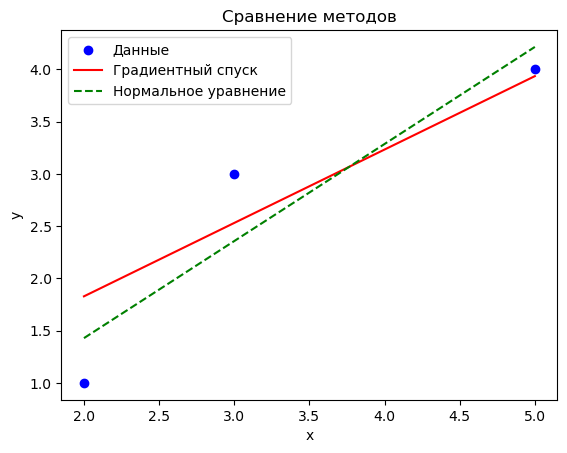

In [321]:
plt.scatter(x, y, color='blue', label='Данные')
y_pred_gd = X.dot(theta)
plt.plot(x, y_pred_gd, color='red', label='Градиентный спуск')
y_pred_ne = X.dot(theta_normal)
plt.plot(x, y_pred_ne, color='green', linestyle='--', label='Нормальное уравнение')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Сравнение методов')
plt.show()


**Задание 2. Исследование скорости спуска**  

Протестируйте функцию `gradient_descent` на наборе данных `ml_lab1_train.txt`/`ml_lab1_test.txt` для разных значений скорости спуска $\eta_k$, например, $\eta_k = \{0.5, 1.0, 2.0\}$.  

Оцените количество шагов для получения решения в каждом случае.

In [322]:
data_train = np.loadtxt('../data/ml_lab1_train.txt', delimiter=',')
data_test = np.loadtxt('../data/ml_lab1_test.txt', delimiter=',')
X_train = data_train[:, 0]
print(
    X_train
)
y_train = data_train[:, 1]
X_test = data_test[:, 0]
y_test = data_test[:, 1]
for i in [0.5, 1.0, 2.0] :
    gradient_descent(X_train, y_train, lr=i, max_iter=1000, eps=1e-6)

[-0.2  -0.14 -0.08 -0.02  0.04  0.1   0.16  0.22  0.28  0.34  0.4   0.46
  0.52  0.58  0.64  0.7   0.76  0.82  0.88  0.94  1.  ]
[0.64 0.82]
(array([4.43322389, 2.27915007]), [9.867527023841133, 1.783717504390525, 0.4250984326315379, 0.19659557993069302, 0.1580178717773164, 0.1513745320332671, 0.1501148807213829, 0.14977547828240936, 0.1496046005656953, 0.1494744190302193, 0.14936210783153944, 0.14926263194018546, 0.14917407627277496, 0.14909516624216873, 0.1490248384779393, 0.14896215742842067, 0.14890629130868982, 0.14885649911230617, 0.14881212045488795, 0.14877256676048642, 0.14873731344629065, 0.14870589296376688, 0.14867788859751552, 0.1486529289385227, 0.1486306829583261, 0.14861085561873594, 0.1485931839588787, 0.1485774336076684, 0.14856339567545085, 0.1485508839835964, 0.14853973259529818, 0.1485297936148289, 0.14852093522606832, 0.1485130399442858, 0.14850600305799536, 0.14849973124021498, 0.148494141310714, 0.14848915913283195, 0.14848471863023802, 0.14848076091059143, 0.14

**Задание 3. Стохастический градиентный спуск**  

Стохастический градиентный спуск отличается от обычного заменой градиента на его оценку по одному или нескольким объектам. В этом случае сложность становится $O(kd)$, где $k$ – количество объектов, по которым оценивается градиент, $k<<l$. Это отчасти объясняет популярность стохастических методов оптимизации.  

Реализуйте функцию `stochastic_gradient_descent`, которая находит вектор весов на основе стохастического градиентного спуска (вычисление градиента на одном случайном примере).  

На наборе данных `ml_lab1_train.txt`/`ml_lab1_test.txt` оцените количество шагов для получения решения при разных значениях скорости спуска $\eta_k$, например, $\eta_k = \{0.5, 1.0, 2.0\}$.

In [323]:
# Ваш код здесь

**Задание 4. Градиентный спуск по мини-батчам**  

Реализуйте функцию `mini_batch_gradient_descent`, которая находит вектор весов на основе градиентного спуска по мини-батчам (вычисление градиента на подмножестве случайно выбранных примеров). Размер мини-батча должен быть параметром функции.  

На наборе данных `ml_lab1_train.txt`/`ml_lab1_test.txt` оцените количество шагов для получения решения при разных значениях скорости спуска $\eta_k$, например, $\eta_k = \{0.5, 1.0, 2.0\}$.

In [324]:
# Ваш код здесь